# Iris de Fisher

mot clefs : classification, représentation de données
    
Ronald Fisher présente en 1936 dans son papier "The use of multiple measurements in taxo- nomic problems" un jeu de données qui comprend 50 échantillons de chacune des trois espèces d’iris (Iris setosa, Iris virginica et Iris versicolor).

![](https://miro.medium.com/max/1400/1*dol7Xh_c_Zc0C3LhBQ2uyg.jpeg)

Quatre caractéristiques ont été mesurées à partir de chaque échantillon : la longueur et la largeur des sépales et des pétales, en centimètres.

![](https://www.informit.com/content/images/chap3_9780134845623/elementLinks/03fig01.jpg)

Ces données sont devenues célèbre par leur utilisation en classification et reste un exemple académique très utilisé.


Le fichier de donnée est disponible :
https://datahub.io/machine-learning/iris/r/iris.csv

In [21]:
import numpy as np  # manipulation efficace vecteur matrice
import pandas as pd

In [22]:
iris = pd.read_csv('https://datahub.io/machine-learning/iris/r/iris.csv');
iris

sepallength  sepalwidth  petallength  petalwidth           class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Partie 1 : représentation graphique

La représentation graphique est une partie à la fois simple mais cruciale pour l'analyse et la compréhension des données.

Dans notre exemple chaque mesure d'iris possède 4 dimension et donc la représentation naturelle se situe dans ${I\!\!R}^4$ ...

On utilisera différentes bibliothèques graphiques : matplotlib, pyplot, seaborn, plotly...

### 1. Histogramme des 3 espèces 
(Iris setosa, Iris virginica et Iris versicolor) suivant chaque variable (sepallength, sepalwidth, petallength et petalwidth)

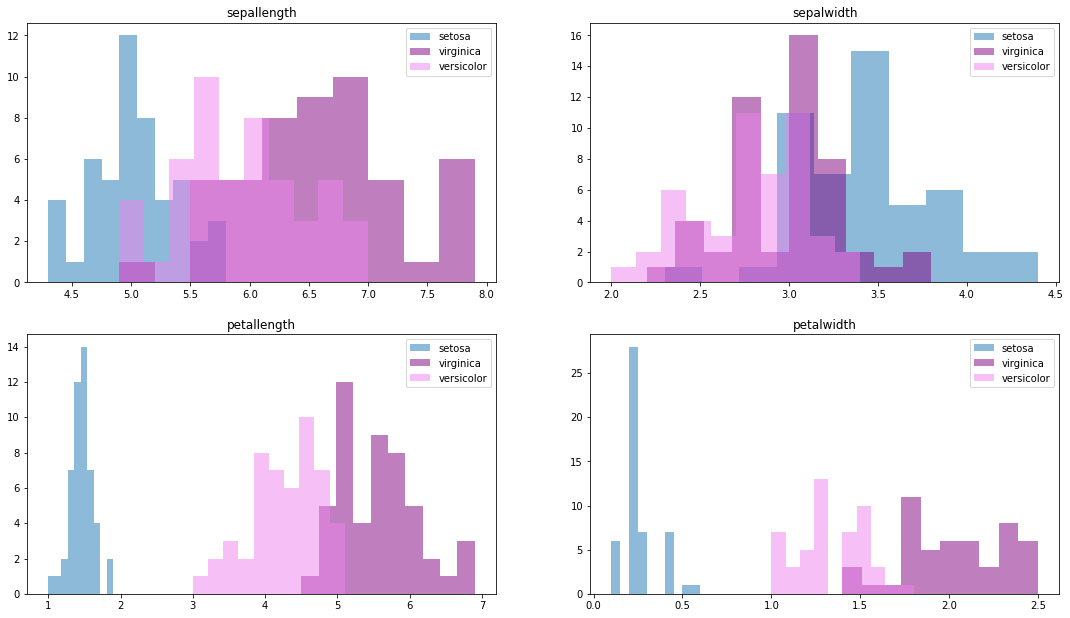

In [3]:
# réalisation Matplotlib
import matplotlib.pyplot as plt

setosa = iris.loc[iris['class']=="Iris-setosa"]
virginica = iris.loc[iris['class']=="Iris-virginica"]
versicolor = iris.loc[iris['class']=="Iris-versicolor"]

figure = plt.subplots(2,2)

plt.subplot(2, 2, 1) 
plt.hist(setosa.sepallength,label='setosa',alpha=0.5)
plt.hist(virginica.sepallength,label='virginica',alpha=0.5,color='purple')
plt.hist(versicolor.sepallength,label='versicolor',alpha=0.5,color='violet')
plt.legend()
plt.title("sepallength")

plt.subplot(2, 2, 2) 
plt.hist(setosa.sepalwidth,label='setosa',alpha=0.5)
plt.hist(virginica.sepalwidth,label='virginica',alpha=0.5,color='purple')
plt.hist(versicolor.sepalwidth,label='versicolor',alpha=0.5,color='violet')
plt.legend()
plt.title("sepalwidth")

plt.subplot(2, 2, 3) 
plt.hist(setosa.petallength,label='setosa',alpha=0.5)
plt.hist(virginica.petallength,label='virginica',alpha=0.5,color='purple')
plt.hist(versicolor.petallength,label='versicolor',alpha=0.5,color='violet')
plt.legend()
plt.title("petallength")

plt.subplot(2, 2, 4) 
plt.hist(setosa.petalwidth,label='setosa',alpha=0.5)
plt.hist(virginica.petalwidth,label='virginica',alpha=0.5,color='purple')
plt.hist(versicolor.petalwidth,label='versicolor',alpha=0.5,color='violet')
plt.legend()
plt.title("petalwidth")

figure = plt.gcf()
figure.set_size_inches(18.5,10.5)

### 2. La fonction **pairplot** de seaborn
pour représenter cette fois 16 graphiques qui seront 4 représention de type histogramme et 12 projections possible de ses points dans ${I\!\!R}^2$ (voir également scatter_matrix de matplotlib).

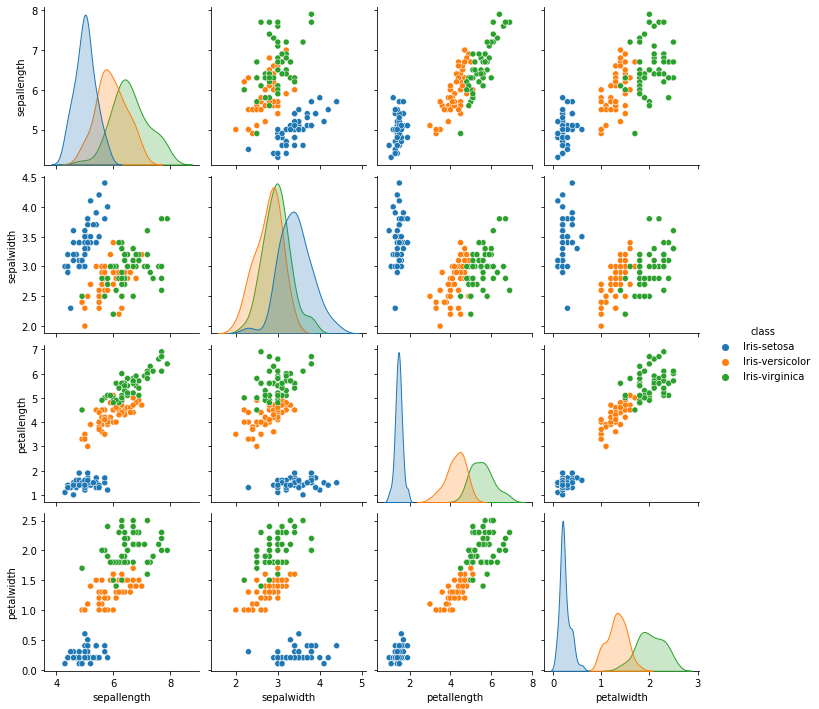

In [4]:
import seaborn as sns
# affichage classique
sns.pairplot(iris, hue="class")

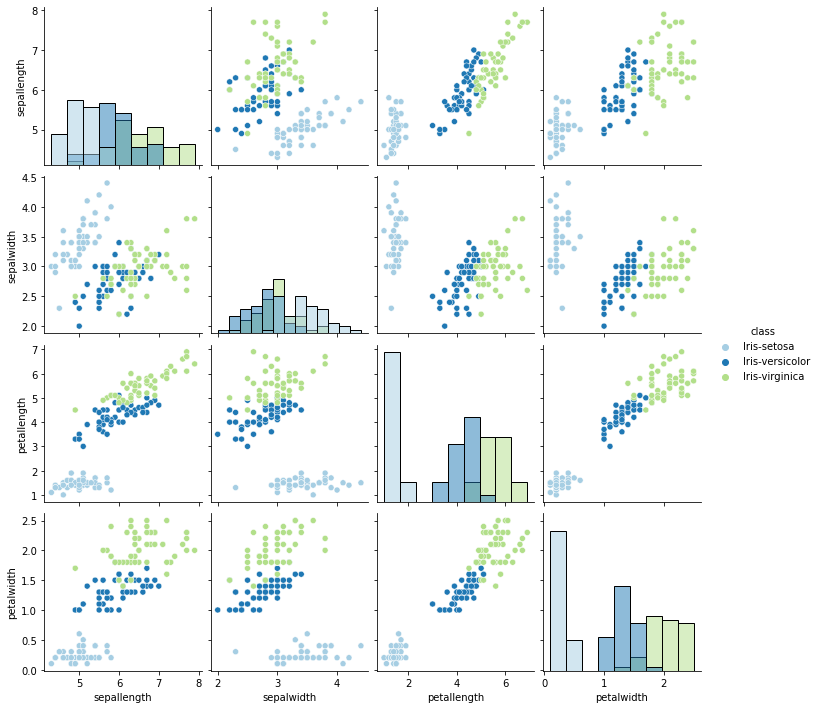

In [5]:
# en utilisant quelques options
sns.pairplot(iris,hue="class",diag_kind="hist",palette="Paired")

### 3. Représentation en "violin plot"
de chaque variable (fonction **violinplot** de seaborn)

Text(0.5, 1.0, 'Répartiton petalwidth')

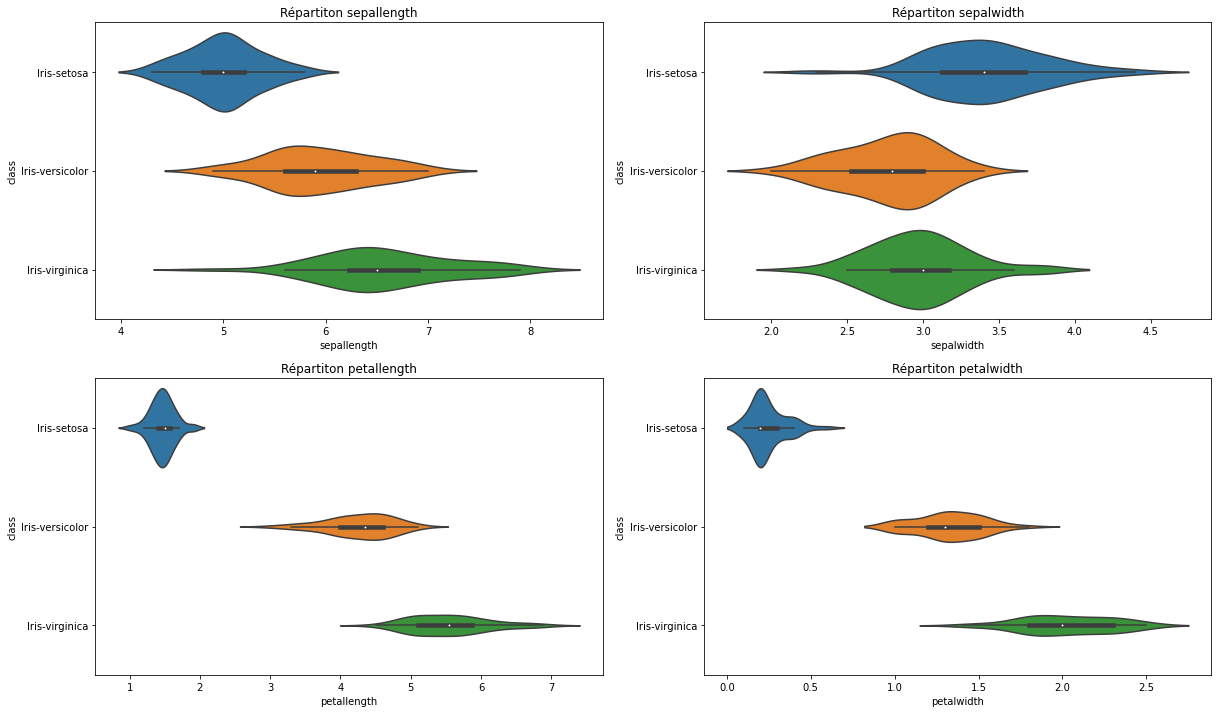

In [6]:
plt.figure(1,figsize=(20,12))
plt.subplot(2,2,1)
sns.violinplot(x=iris.sepallength, y=iris['class'])
plt.title('Répartiton sepallength')

plt.subplot(2,2,2)
sns.violinplot(x=iris.sepalwidth, y=iris['class'])
plt.title('Répartiton sepalwidth')

plt.subplot(2,2,3)
sns.violinplot(x=iris.petallength, y=iris['class'])
plt.title('Répartiton petallength')

plt.subplot(2,2,4)
sns.violinplot(x=iris.petalwidth, y=iris['class'])
plt.title('Répartiton petalwidth')

### 4. Représentation graphique 3d
sur le même graphique (4 sous figures) les 4 représentaion 3d possible, en enlevant à chaque fois une composante.

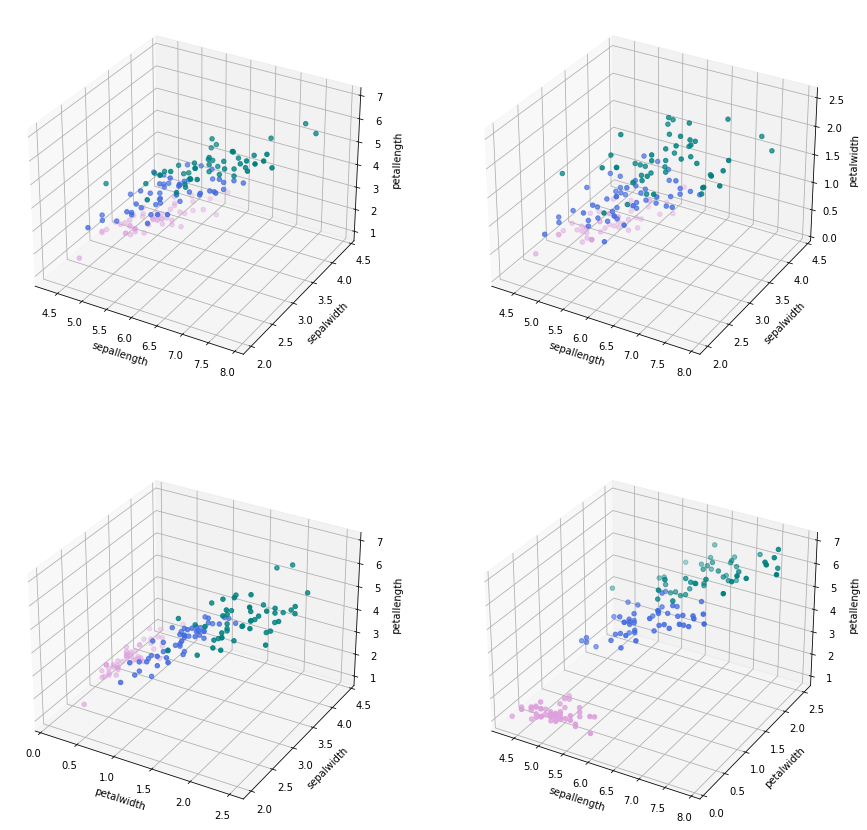

In [7]:
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D

colours = ("r", "g", "y")
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(221, projection='3d')
colors = {'Iris-setosa':'plum', 'Iris-virginica':'teal', 'Iris-versicolor':'royalblue'}

ax.scatter(iris.sepallength, iris.sepalwidth, iris.petallength, c=iris["class"].map(colors))
ax.set_xlabel("sepallength")
ax.set_ylabel("sepalwidth")
ax.set_zlabel("petallength")

ax = fig.add_subplot(222, projection='3d')
ax.scatter(iris.sepallength, iris.sepalwidth, iris.petalwidth, c=iris["class"].map(colors))
ax.set_xlabel("sepallength")
ax.set_ylabel("sepalwidth")
ax.set_zlabel("petalwidth")

ax = fig.add_subplot(223, projection='3d')
ax.scatter(iris.petalwidth, iris.sepalwidth, iris.petallength, c=iris["class"].map(colors))
ax.set_xlabel("petalwidth")
ax.set_ylabel("sepalwidth")
ax.set_zlabel("petallength")

ax = fig.add_subplot(224, projection='3d')
ax.scatter(iris.sepallength, iris.petalwidth, iris.petallength, c=iris["class"].map(colors))
ax.set_xlabel("sepallength")
ax.set_ylabel("petalwidth")
ax.set_zlabel("petallength")


plt.show()

### 5. Représentation en analyse en composante principale (PCA):
   * 2 axes principaux
   * 3 axes principaux


Text(0, 0.5, 'Seconde composante principale')

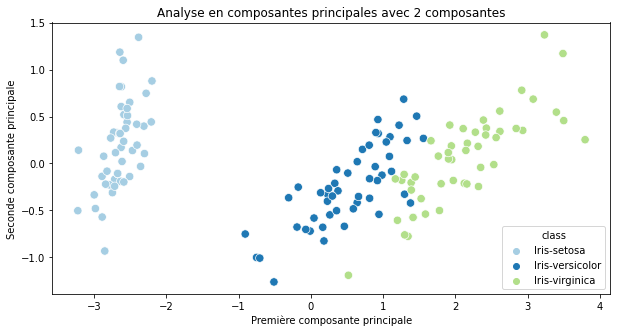

In [8]:
from sklearn.decomposition import PCA

irisRest = iris[["sepallength", "sepalwidth", "petallength", "petalwidth"]]

pca = PCA(n_components = 4)
pca.fit(irisRest)
iris_pca = pca.transform(irisRest)

fig, axe = plt.subplots(1,1, figsize = (10, 5))
sns.scatterplot(x = iris_pca[:, 0], y = iris_pca[:, 1], s = 70, hue = iris["class"], ax = axe,palette="Paired")
axe.set_title("Analyse en composantes principales avec 2 composantes")
axe.set_xlabel("Première composante principale")
axe.set_ylabel("Seconde composante principale")

In [10]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
       [-0.58099728,  0.59641809,  0.07252408,  0.54906091],
       [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]])

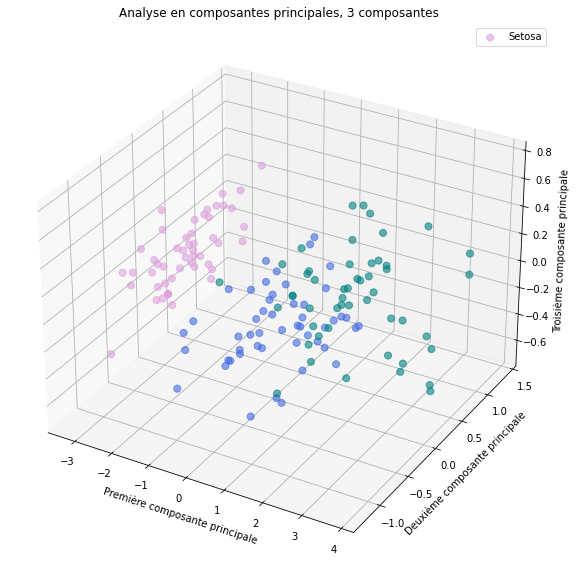

In [14]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = "3d")
ax.scatter(iris_pca[:, 0], iris_pca[:, 1], iris_pca[:, 2], s = 50, alpha = 0.6, c=iris["class"].map(colors))
plt.title("Analyse en composantes principales, 3 composantes")
ax.set_xlabel("Première composante principale")
ax.set_ylabel("Deuxième composante principale")
ax.set_zlabel("Troisième composante principale")
ax.legend(["Setosa", "Veriscolor", "Virginica"])

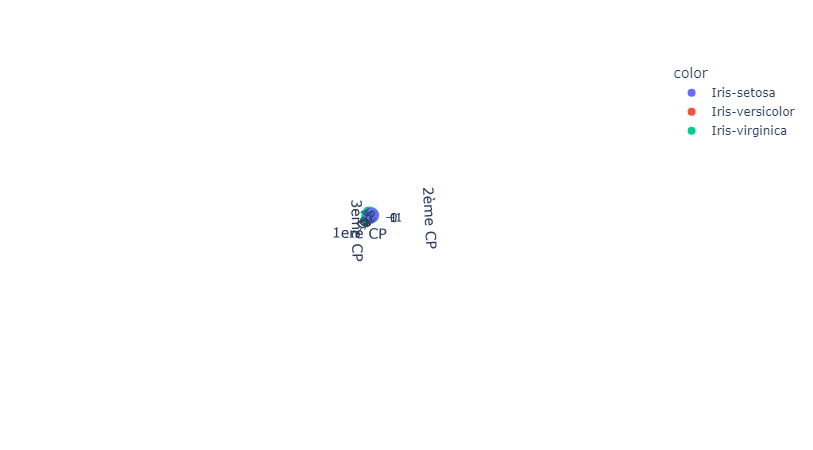

In [15]:
import plotly.express as px
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    iris_pca[:, :3], x=0, y=1, z=2, color=iris['class'],
    labels={'0': '1ere CP', '1': '2ème CP', '2': '3ème CP'}
)
fig.show()

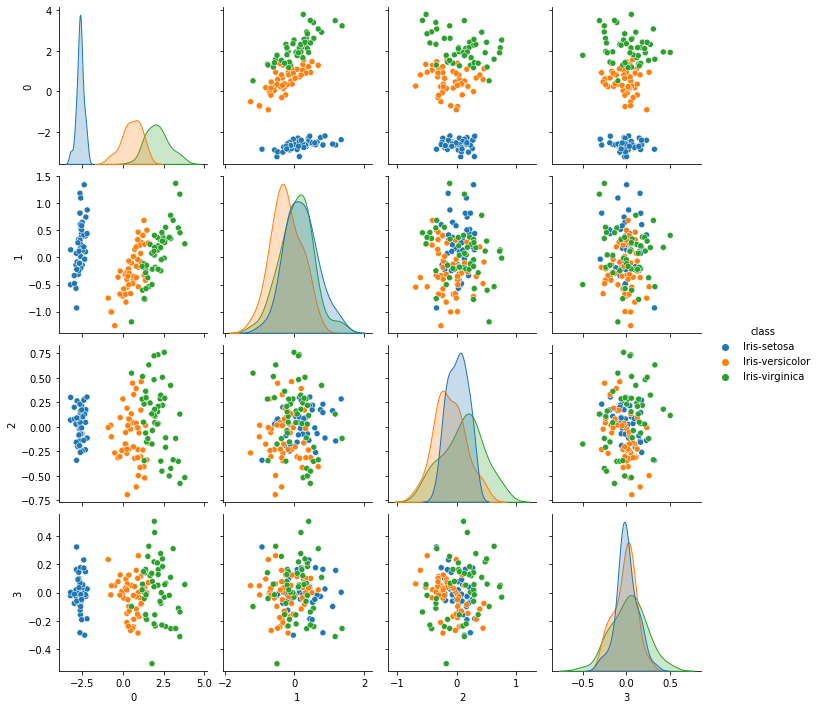

In [16]:
iris_pca_pd=pd.DataFrame(data = iris_pca);
iris_pca_pd=pd.merge(iris_pca_pd, iris["class"], left_index = True, right_index = True);
    
sns.pairplot(iris_pca_pd, hue = "class")
colors = {'Iris-setosa':'plum', 'Iris-virginica':'teal', 'Iris-versicolor':'royalblue'}

### 6. Matrice de corrélation
des 4 variables et faire une représentation graphique à l'aide de la fonction **heatmap** de seaborn (voir également pandas.corr()).

<AxesSubplot:>

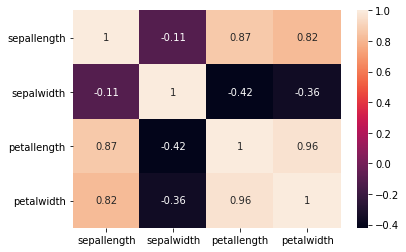

In [17]:
corr_iris = iris.corr(method="pearson")
sns.heatmap(corr_iris, annot = True) 

## Partie 2 : classification à l'aide de réseaux neuronneaux

Il faut en premier lieu "mathématiser" nos classes autrement dit encoder les label Iris-setosa, Iris-versicolor, Iris-virginica. 

In [23]:
# 2. Extraire les colonnes pour X
X = iris.iloc[:, :-1].values

# 3. Convertir les labels de la colonne cible en numérique pour obtenir Y
#iris['class'] = iris['class'].astype('category')
# Y = iris['class'].cat.codes.values
Y = iris.iloc[:, -1].values 
Y = np.where(Y == 'Iris-setosa', 0, np.where(Y == 'Iris-versicolor', 1, 2))


print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [25]:
# Créer un modèle séquentiel Keras
model = keras.Sequential()

# Ajouter une couche d'entrée avec 4 neurones (correspondant aux caractéristiques)
model.add(layers.Input(shape=(4,)))

# Ajouter une couche cachée avec 8 neurones et une fonction d'activation ReLU
model.add(layers.Dense(8, activation='relu'))

# Ajouter une couche de sortie avec 3 neurones (correspondant aux classes Iris)
# Utiliser une fonction d'activation softmax pour la classification multiclasses
model.add(layers.Dense(1, activation='linear'))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 40        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.get_weights()

[array([[-0.202874  , -0.20117009,  0.30858082, -0.00514561, -0.11152154,
          0.61960655,  0.618058  ,  0.69045156],
        [-0.09688681,  0.28739482, -0.6921688 , -0.50394076, -0.58545697,
          0.32877916, -0.58569145, -0.06427377],
        [ 0.6567983 , -0.13365   ,  0.6946381 , -0.34354788, -0.22666085,
         -0.35420448, -0.6312881 , -0.60394394],
        [-0.31442627, -0.40158343,  0.14950597, -0.56934625,  0.161865  ,
          0.14186496,  0.63073   , -0.16731256]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.28243303],
        [ 0.77118397],
        [-0.06347984],
        [ 0.22036314],
        [-0.23063695],
        [ 0.7826053 ],
        [ 0.32305813],
        [ 0.18965912]], dtype=float32),
 array([0.], dtype=float32)]

In [28]:
# Compiler le modèle en spécifiant la fonction de perte, l'optimiseur
model.compile(loss='mse', optimizer='adam')

In [34]:
# Entraîner le modèle sur les données d'entraînement
model.fit(X, Y, epochs=150, batch_size=150, verbose=2)

Epoch 1/150
1/1 - 0s - loss: 0.0594 - 6ms/epoch - 6ms/step
Epoch 2/150
1/1 - 0s - loss: 0.0593 - 3ms/epoch - 3ms/step
Epoch 3/150
1/1 - 0s - loss: 0.0592 - 3ms/epoch - 3ms/step
Epoch 4/150
1/1 - 0s - loss: 0.0592 - 3ms/epoch - 3ms/step
Epoch 5/150
1/1 - 0s - loss: 0.0591 - 3ms/epoch - 3ms/step
Epoch 6/150
1/1 - 0s - loss: 0.0590 - 3ms/epoch - 3ms/step
Epoch 7/150
1/1 - 0s - loss: 0.0590 - 3ms/epoch - 3ms/step
Epoch 8/150
1/1 - 0s - loss: 0.0589 - 3ms/epoch - 3ms/step
Epoch 9/150
1/1 - 0s - loss: 0.0588 - 3ms/epoch - 3ms/step
Epoch 10/150
1/1 - 0s - loss: 0.0588 - 3ms/epoch - 3ms/step
Epoch 11/150
1/1 - 0s - loss: 0.0587 - 3ms/epoch - 3ms/step
Epoch 12/150
1/1 - 0s - loss: 0.0586 - 3ms/epoch - 3ms/step
Epoch 13/150
1/1 - 0s - loss: 0.0586 - 3ms/epoch - 3ms/step
Epoch 14/150
1/1 - 0s - loss: 0.0585 - 12ms/epoch - 12ms/step
Epoch 15/150
1/1 - 0s - loss: 0.0585 - 3ms/epoch - 3ms/step
Epoch 16/150
1/1 - 0s - loss: 0.0584 - 3ms/epoch - 3ms/step
Epoch 17/150
1/1 - 0s - loss: 0.0583 - 3ms/epoc

In [17]:
Ypred=model.predict(X)
Ypred.round()

from sklearn.metrics import confusion_matrix
matrice_confusion = confusion_matrix(Y, Ypred.round())


matrice_confusion

NameError: name 'model' is not defined